预测和Color对比展示

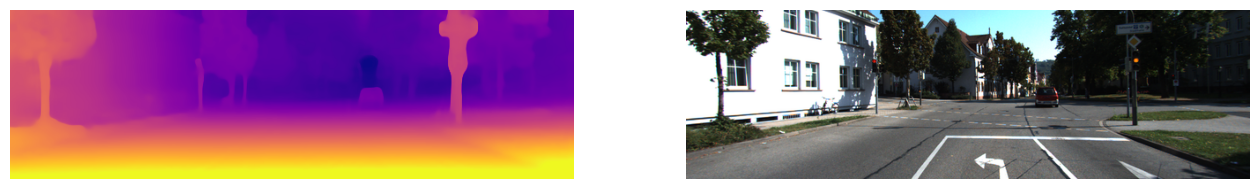

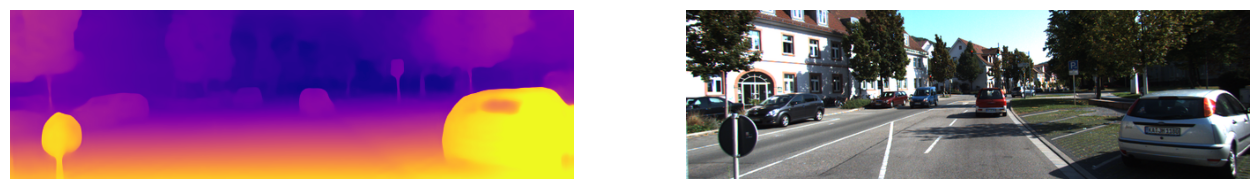

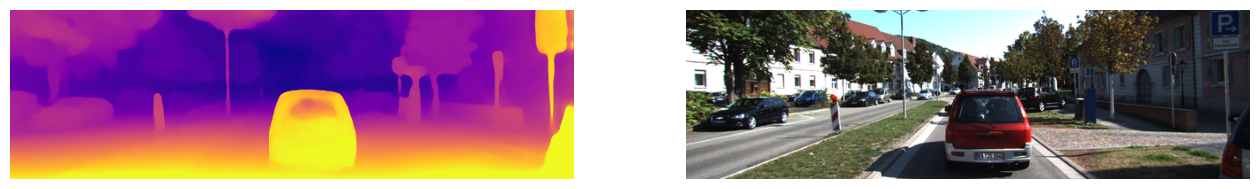

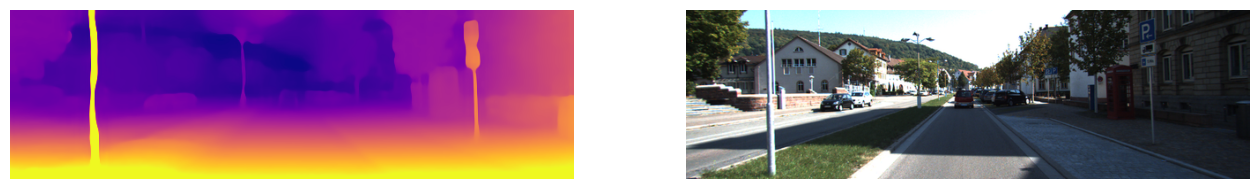

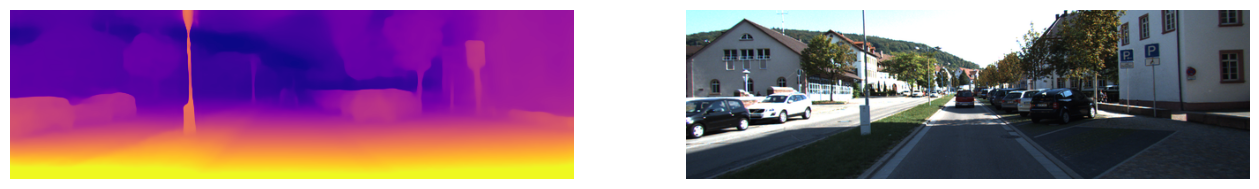

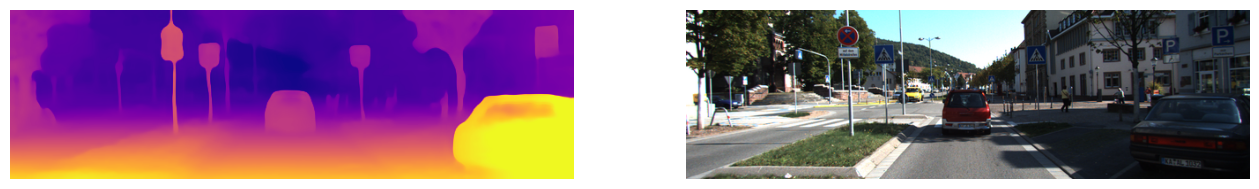

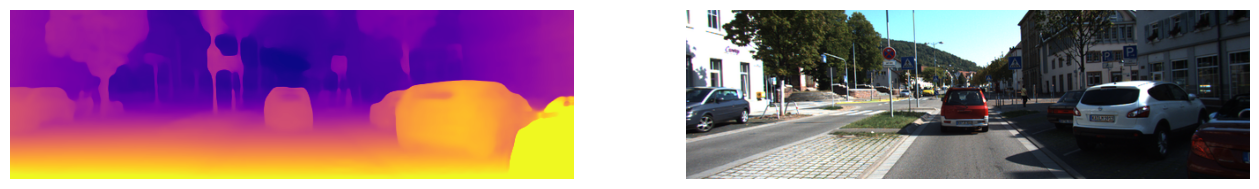

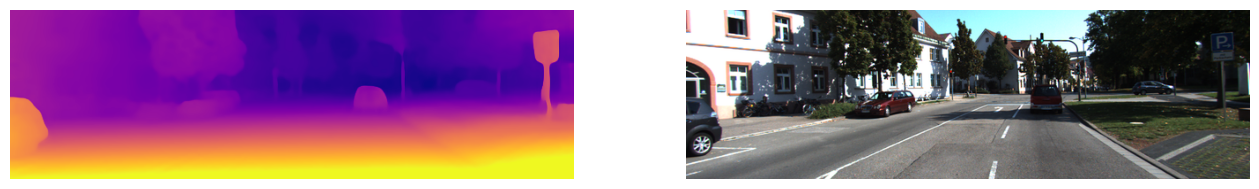

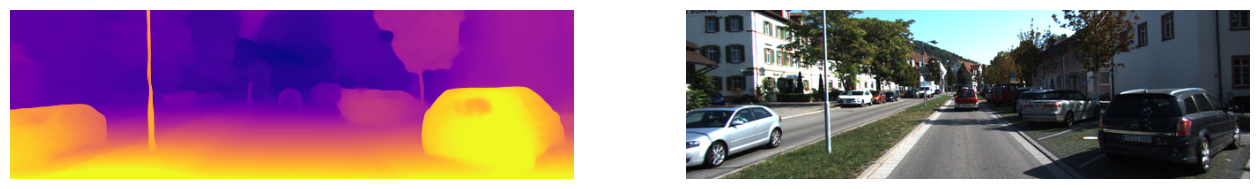

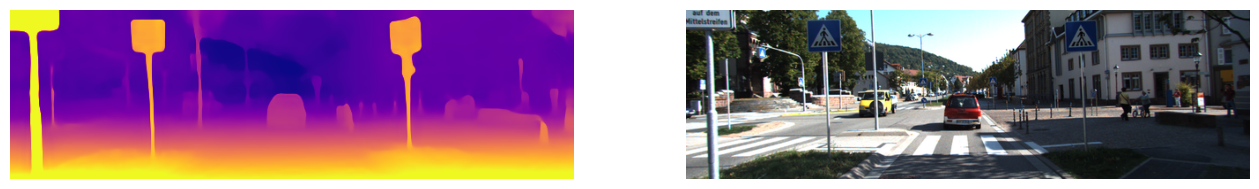

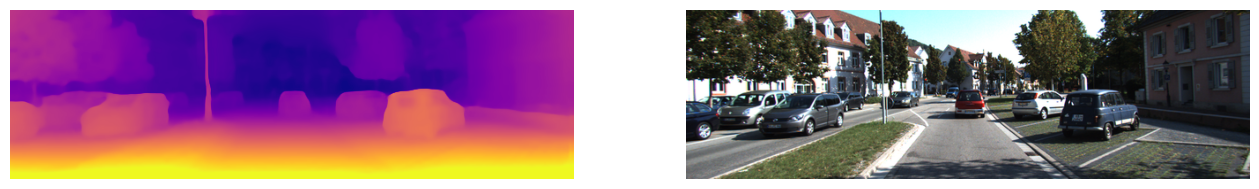

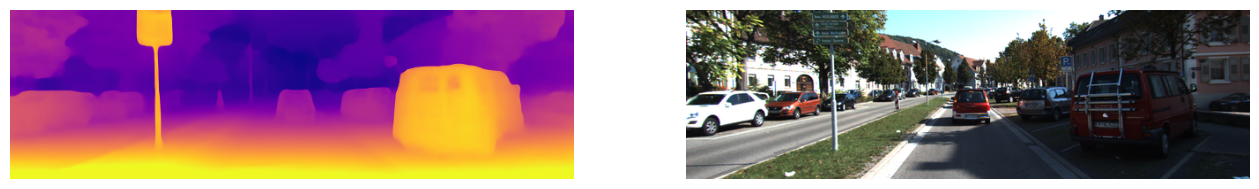

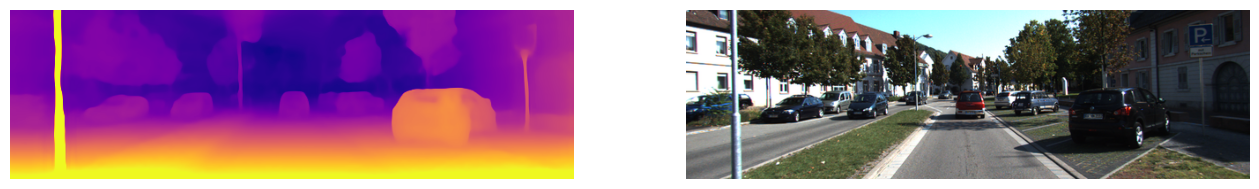

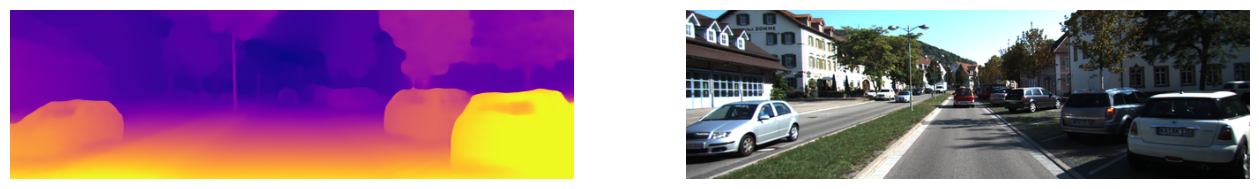

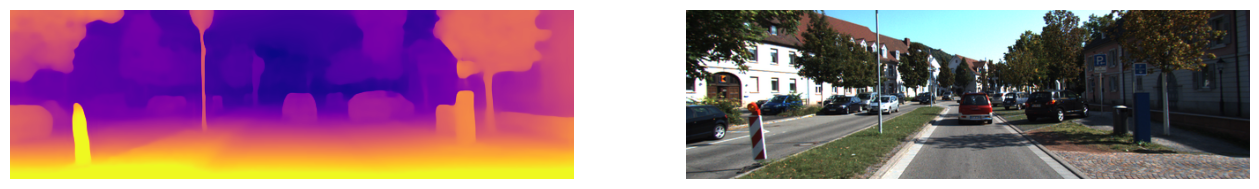

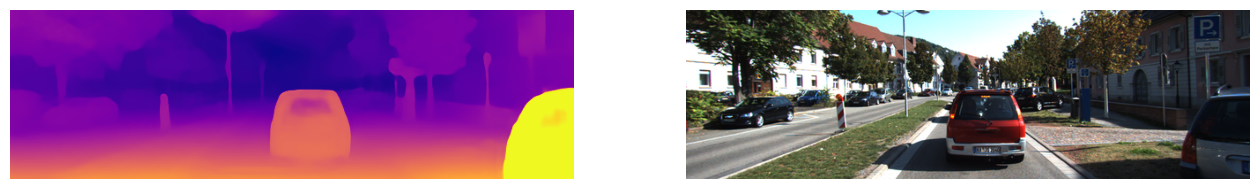

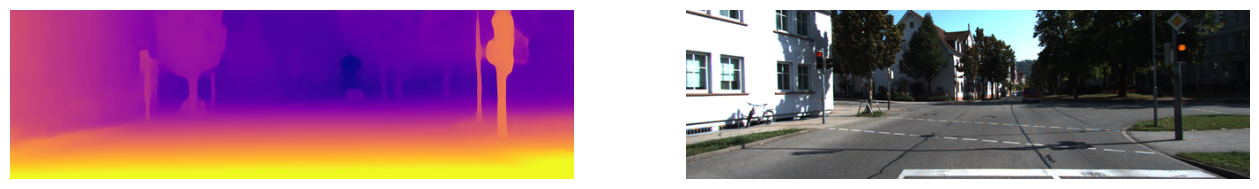

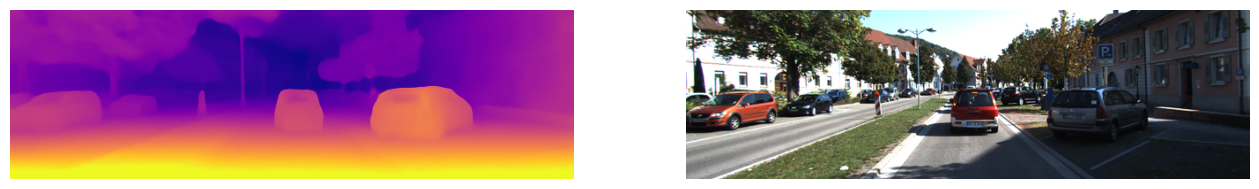

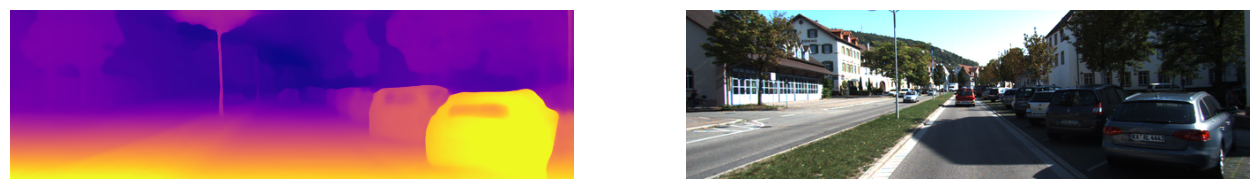

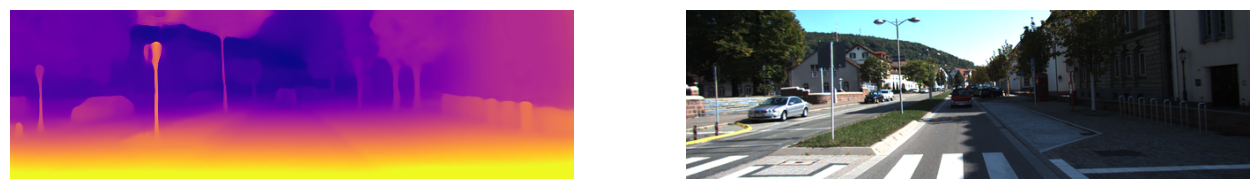

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from PIL import Image

START_INDEX = 300
END_INDEX = 320

# 配置参数
pred_disps_path = "~/code/GS-Depth/models/hrnet_encoder_nogs_test_v1/eval/disps_eigen_split.npy"
color_path = "~/code/GS-Depth/splits/eigen/gt_colors.npz"
# 加载数据
pred_disps = np.load(pred_disps_path)
colors = np.load(color_path)


for i in range(START_INDEX, END_INDEX):
    disp_np = pred_disps[i].squeeze()
    color = colors[i]
    color = color.transpose(1, 2, 0) 
    
    vmax = np.percentile(disp_np, 95)
    normalizer = mpl.colors.Normalize(vmin=disp_np.min(), vmax=vmax)
    mapper = cm.ScalarMappable(norm=normalizer, cmap='plasma')
    colormapped_im = (mapper.to_rgba(disp_np)[:, :, :3] * 255).astype(np.uint8)
    pred_im = Image.fromarray(colormapped_im)
    
    # 可视化设置
    plt.figure(figsize=(16, 8), dpi=100)
    
    plt.subplot(1, 2, 1)
    plt.imshow(pred_im, cmap='plasma', vmax=vmax)
    # plt.title(f'Ground Truth (Range: {vmin:.1f}-{vmax:.1f}m)')
    plt.axis('off')
    
    # 预测可视化
    plt.subplot(1, 2, 2)
    plt.imshow(color)
    plt.axis('off')
    